# E-commerce Shipping

-  <a name='split'> Importing libraries: </a>
-  <a name='split'> Helper Functions </a>
-  <a name='split'> Read </a>
-  <a name='split'> Formate </a>
-  <a name='split'> Feature Engineering </a>
-  <a name='split'> Drop not needed columns </a>
-  <a name='split'> Create X, y</a>
-  <a name='split'> Build our feature list for cat. and numeric </a>
-  <a name='split'> Dummy variables and label encoder </a>
-  <a name='split'> Split the data </a>
-  <a name='split'> Expr0: Baseline Model with numerical cols </a> 
-  <a name='split'> Expr1: with all the data (dummy included) </a>
-  <a name='split'> Expr2: with scaling (standard scaler or minmax scaler) </a>
-  <a name='split'> Expr3: with grid search </a>
-  <a name='split'> Precision_recall_curve </a>
-  <a name='split'> Confusion matrix </a>
-  <a name='split'> Expr4: with random over sampling </a>
-  <a name='split'> Exer5: with SMOTE </a> 
-  <a name='split'> Expr6: with random under sampling </a>
-  <a name='split'> Expr7: with using Decision Tree </a>
-  <a name='split'> Tuning Decision Tree </a>
-  <a name='split'> Exper8: with using Random forest </a>
-  <a name='split'> Exper9: with Voting Classifier with KNN, Logistic Regression & Random Forest </a>
-  <a name='split'> Exper10: with Stacking Classifie </a>
-  <a name='split'> Exper11: with xgboost </a>
-  <a name='split'> ROC curve </a>



#### <a name='split'> Importing libraries </a>

In [104]:
# import
print("importing......", flush=True)
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, fbeta_score, confusion_matrix, classification_report, make_scorer
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns



%matplotlib inline
%pylab inline
%config InlineBackend.figure_formats = ['retina']

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

print("[Done]")

importing......
Populating the interactive namespace from numpy and matplotlib
[Done]


####  <a name='split'> Helper Functions </a>

In [105]:
# Helper Functions

def model_eval(mdl_local, X_local, y_local, bta = 1):
    y_pred = mdl_local.predict(X_local)
    print(f"F({bta}):", fbeta_score(y_local, y_pred, beta= bta))
    print("Precision :", precision_score(y_local, y_pred))
    print("Recall :", recall_score(y_local, y_pred))
    
def make_confusion_matrix(model, X_local, y_local, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_local)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_local, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['0', '1'],
           yticklabels=['0', '1']);
    plt.xlabel('prediction')
    plt.ylabel('actual')
    
def make_class_report(model, X_local, y_local, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_local)[:, 1] >= threshold)
    print(classification_report(y_local, y_predict))

####  <a name='split'> Read the data </a>

In [106]:
# Read
df = pd.read_csv("C:/Users/ASUS/Desktop/Sdaia/Third project/shipping.csv")
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


###  <a name='split'> Formate </a>

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [108]:
# describe Statistical Data
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [109]:
#look at the column names
df.columns 

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [110]:
#Convert Column name to Upper case
df.columns=df.columns.str.upper()
df

,ID,WAREHOUSE_BLOCK,MODE_OF_SHIPMENT,CUSTOMER_CARE_CALLS,CUSTOMER_RATING,COST_OF_THE_PRODUCT,PRIOR_PURCHASES,PRODUCT_IMPORTANCE,GENDER,DISCOUNT_OFFERED,WEIGHT_IN_GMS,REACHED.ON.TIME_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


#### <a name='split'> Feature Engineering </a>

In [111]:
# Feature engineering
df.nunique()

ID                     10999
WAREHOUSE_BLOCK            5
MODE_OF_SHIPMENT           3
CUSTOMER_CARE_CALLS        6
CUSTOMER_RATING            5
COST_OF_THE_PRODUCT      215
PRIOR_PURCHASES            8
PRODUCT_IMPORTANCE         3
GENDER                     2
DISCOUNT_OFFERED          65
WEIGHT_IN_GMS           4034
REACHED.ON.TIME_Y.N        2
dtype: int64

In [112]:
df["REACHED.ON.TIME_Y.N"]

0        1
1        1
2        1
3        1
4        1
        ..
10994    1
10995    0
10996    0
10997    0
10998    0
Name: REACHED.ON.TIME_Y.N, Length: 10999, dtype: int64

In [113]:
#change the "1" & "0" to "0" &"1"
df["REACHED.ON.TIME_Y.N"] = df["REACHED.ON.TIME_Y.N"].replace([0,1],[1,0])

In [114]:
df.head()

,ID,WAREHOUSE_BLOCK,MODE_OF_SHIPMENT,CUSTOMER_CARE_CALLS,CUSTOMER_RATING,COST_OF_THE_PRODUCT,PRIOR_PURCHASES,PRODUCT_IMPORTANCE,GENDER,DISCOUNT_OFFERED,WEIGHT_IN_GMS,REACHED.ON.TIME_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,0
1,2,F,Flight,4,5,216,2,low,M,59,3088,0
2,3,A,Flight,2,2,183,4,low,M,48,3374,0
3,4,B,Flight,3,3,176,4,medium,M,10,1177,0
4,5,C,Flight,2,2,184,3,medium,F,46,2484,0


In [115]:
#check null values 
df.isnull().sum()

ID                     0
WAREHOUSE_BLOCK        0
MODE_OF_SHIPMENT       0
CUSTOMER_CARE_CALLS    0
CUSTOMER_RATING        0
COST_OF_THE_PRODUCT    0
PRIOR_PURCHASES        0
PRODUCT_IMPORTANCE     0
GENDER                 0
DISCOUNT_OFFERED       0
WEIGHT_IN_GMS          0
REACHED.ON.TIME_Y.N    0
dtype: int64

#### <a name='split'> Drop not needed columns </a>

In [116]:
# Drop the columns
df.drop(["ID","WAREHOUSE_BLOCK", "COST_OF_THE_PRODUCT", "WEIGHT_IN_GMS"], axis="columns", inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   MODE_OF_SHIPMENT     10999 non-null  object
 1   CUSTOMER_CARE_CALLS  10999 non-null  int64 
 2   CUSTOMER_RATING      10999 non-null  int64 
 3   PRIOR_PURCHASES      10999 non-null  int64 
 4   PRODUCT_IMPORTANCE   10999 non-null  object
 5   GENDER               10999 non-null  object
 6   DISCOUNT_OFFERED     10999 non-null  int64 
 7   REACHED.ON.TIME_Y.N  10999 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 687.6+ KB


#### <a name='split'> Create X, y</a>

In [117]:
# Create X,y
X = df.drop("REACHED.ON.TIME_Y.N", axis="columns")
y = df["REACHED.ON.TIME_Y.N"]

####  <a name='split'> Build our feature list for cat. and numeric </a>

In [118]:
# Build our feature list for cat. and numeric
num_list = X.select_dtypes(include=np.number).columns
cat_list = X.select_dtypes(exclude=np.number).columns
print(num_list, cat_list)

Index(['CUSTOMER_CARE_CALLS', 'CUSTOMER_RATING', 'PRIOR_PURCHASES',
       'DISCOUNT_OFFERED'],
      dtype='object') Index(['MODE_OF_SHIPMENT', 'PRODUCT_IMPORTANCE', 'GENDER'], dtype='object')


#### <a name='split'> Dummy variables and label encoder </a>

In [119]:
# Dummy creation
X = pd.get_dummies(X, drop_first=True)
X.head()

,CUSTOMER_CARE_CALLS,CUSTOMER_RATING,PRIOR_PURCHASES,DISCOUNT_OFFERED,MODE_OF_SHIPMENT_Road,MODE_OF_SHIPMENT_Ship,PRODUCT_IMPORTANCE_low,PRODUCT_IMPORTANCE_medium,GENDER_M
0,4,2,3,44,0,0,1,0,0
1,4,5,2,59,0,0,1,0,1
2,2,2,4,48,0,0,1,0,1
3,3,3,4,10,0,0,0,1,1
4,2,2,3,46,0,0,0,1,0


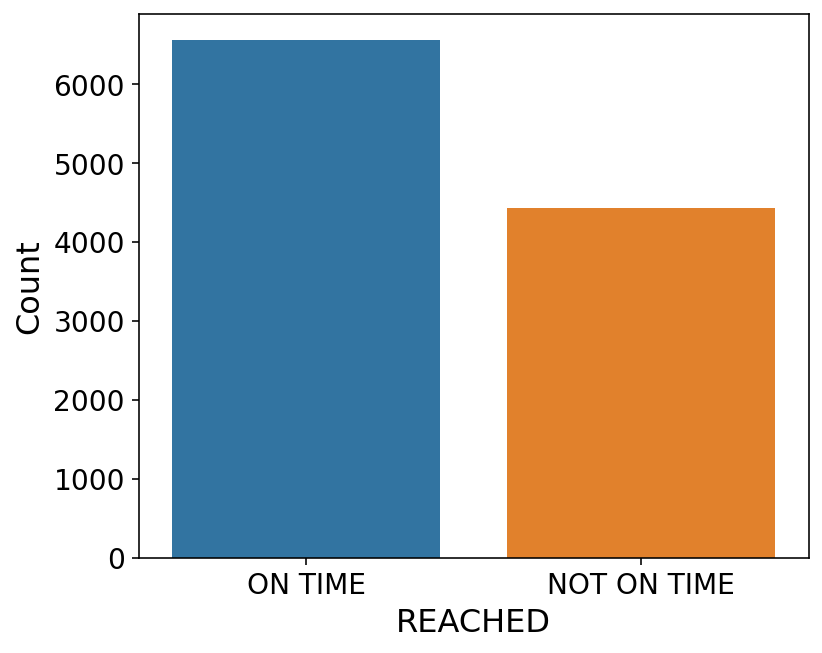

In [120]:
#check implalance classes
fig_dims = (6,5)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.countplot(df['REACHED.ON.TIME_Y.N'],ax=ax)
g.set_xticklabels(['ON TIME','NOT ON TIME'], fontsize = 18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('REACHED',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.show()

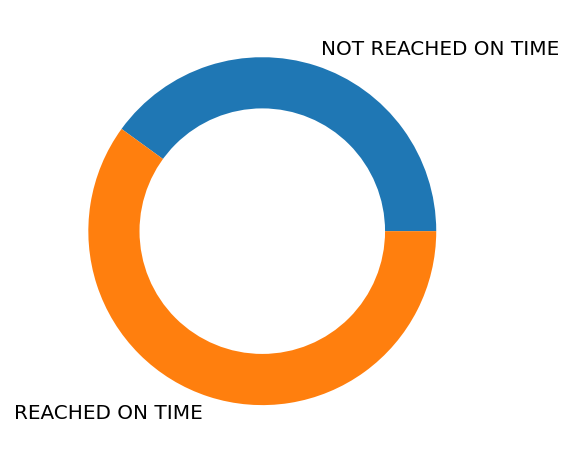

<Figure size 432x288 with 0 Axes>

In [121]:
# create data
names = [ 'NOT REACHED ON TIME','REACHED ON TIME']
size = [40,60]
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Not enough colors --> colors will cycle
plt.pie(size, labels=names, )
p = plt.gcf()
p.gca().add_artist(my_circle)

# Show the graph
plt.show()
plt.savefig('FCORR.png', transparent=True, bbox_inches='tight');

####  <a name='split'> Split the data </a>

In [122]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)

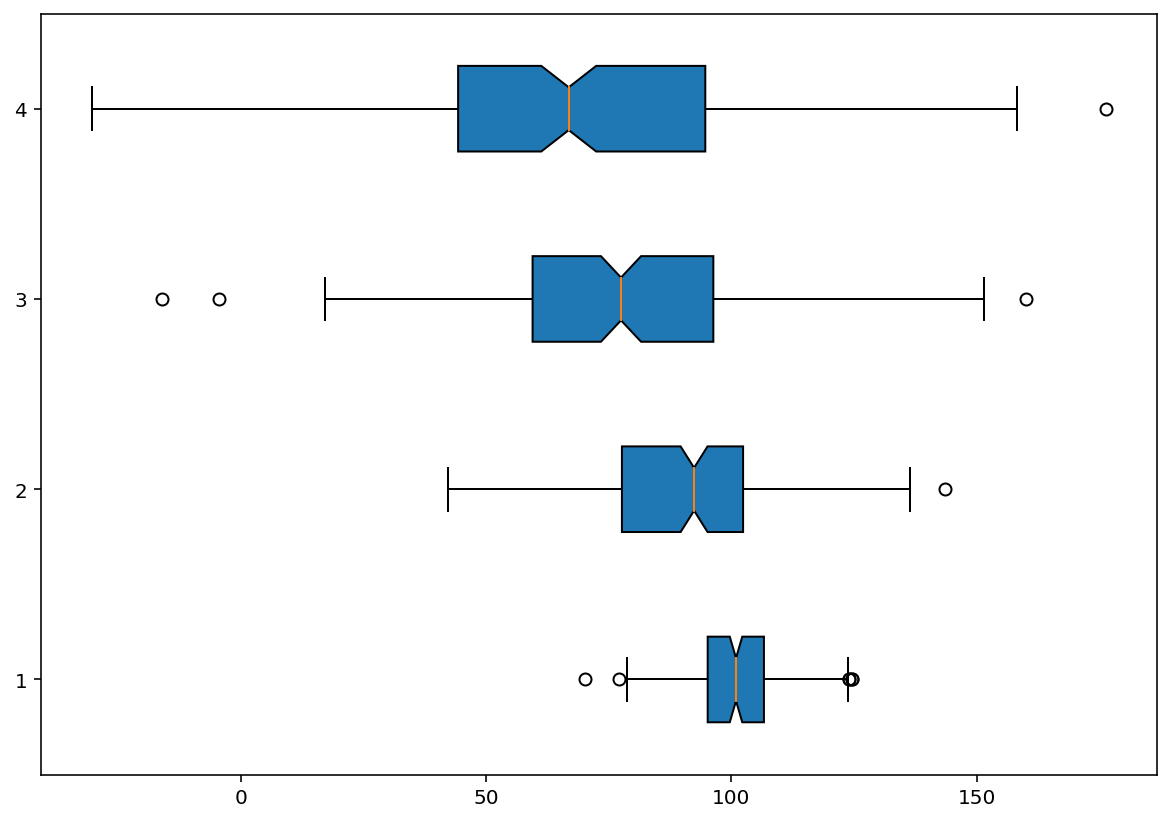

In [123]:
#visulaztion the Liner or nonliner 
np.random.seed(10)
data_1 = np.random.normal(100, 10, 200)
data_2 = np.random.normal(90, 20, 200)
data_3 = np.random.normal(80, 30, 200)
data_4 = np.random.normal(70, 40, 200)
data = [data_1, data_2, data_3, data_4]
 
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 0)
 
colors = ['#0000FF', '#00FF00',
          '#FFFF00', '#FF00FF']



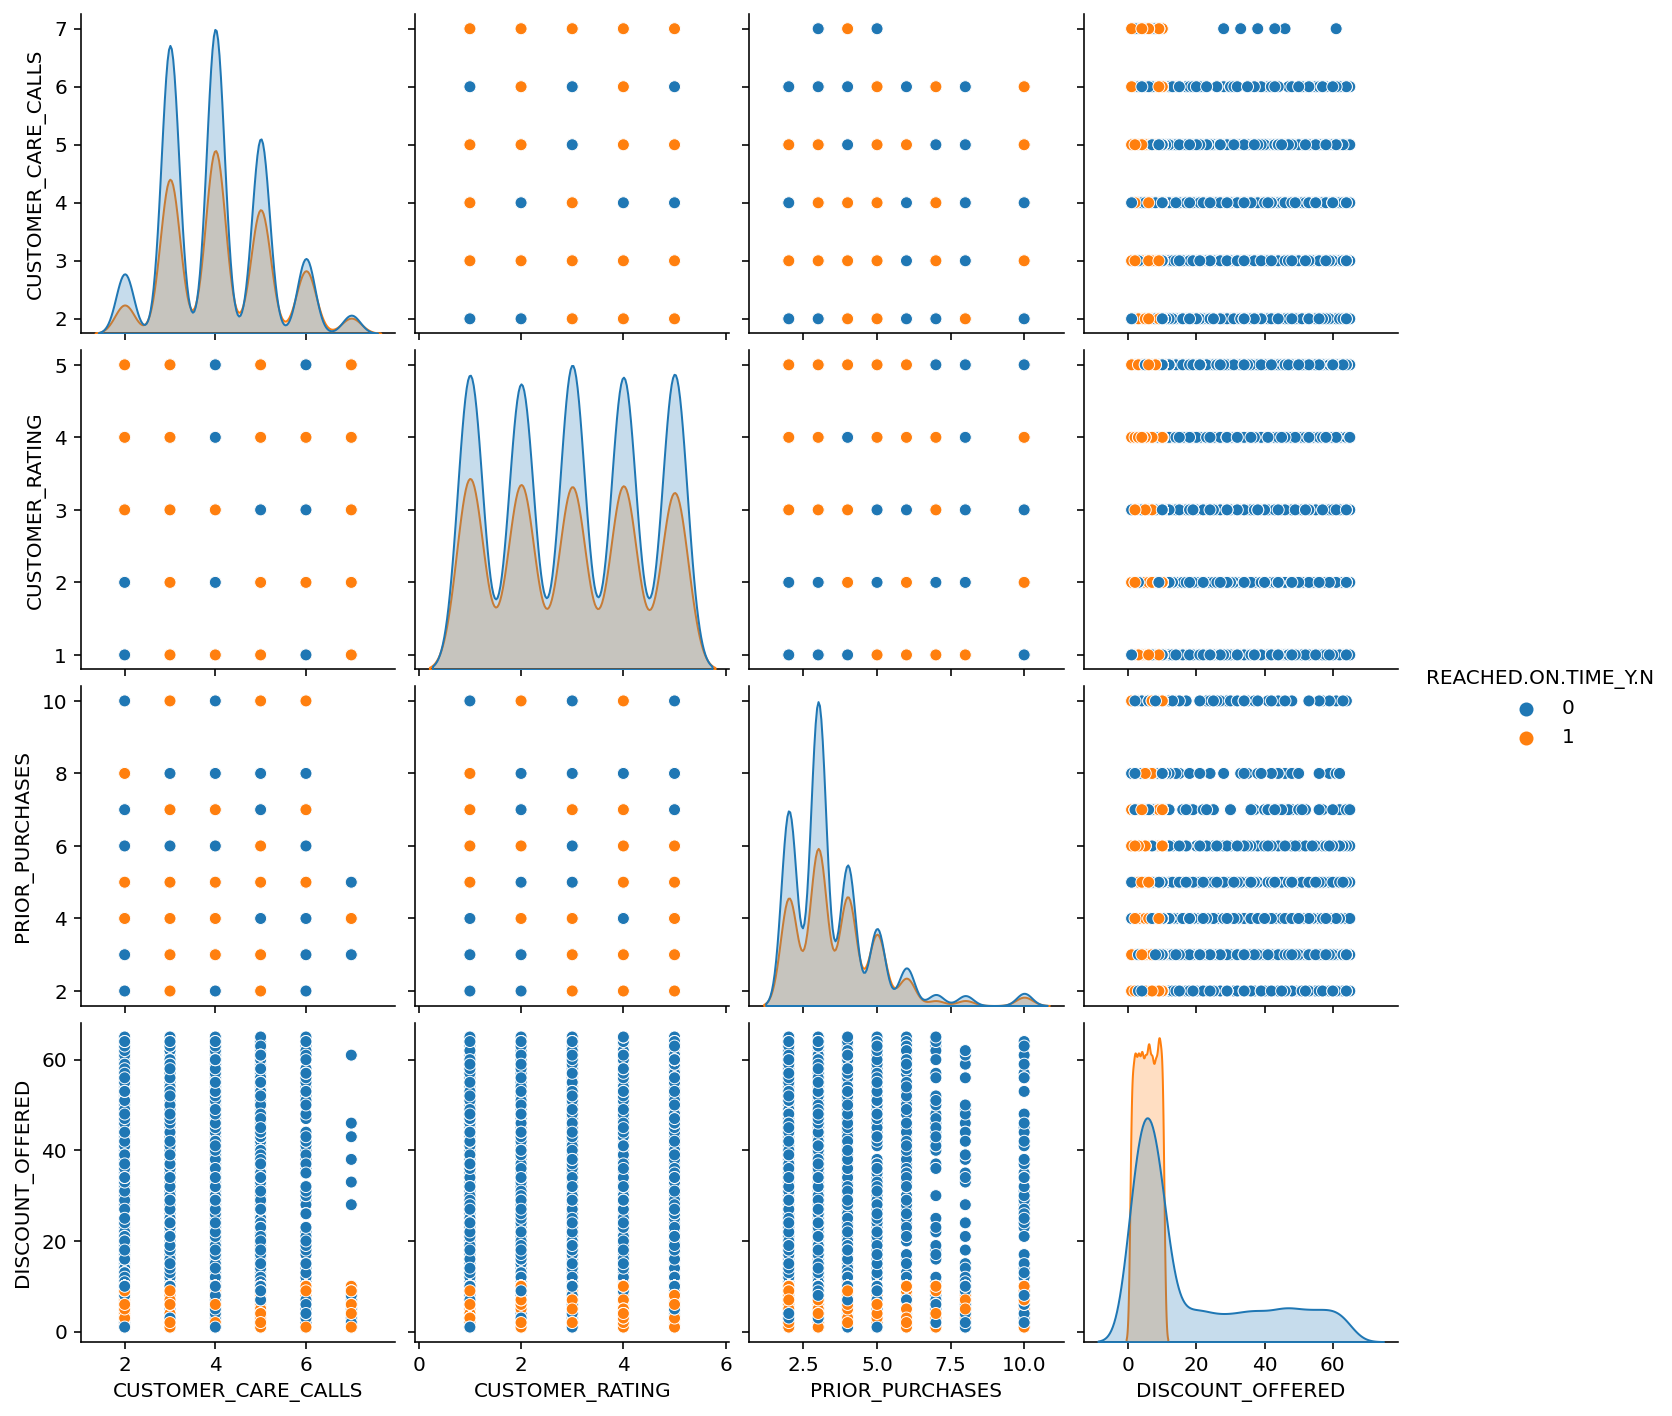

In [124]:
sns.pairplot(df,hue="REACHED.ON.TIME_Y.N")

# Experiments:

####  <a name='split'> Expr0: Baseline Model with numerical cols </a>

In [125]:
# Baseline Model with numerical cols (Expr0)
model = LogisticRegression()
model.fit(X_train[num_list], y_train)
print("TRAIN:", model.score(X_train[num_list], y_train))
print("Test:",model.score(X_test[num_list], y_test))
model_eval(model, X_test[num_list], y_test)

TRAIN: 0.6189339697692919
Test: 0.6240909090909091
F(1): 0.5330321852060982
Precision : 0.5339366515837104
Recall : 0.532130777903044


#### <a name='split'> Expr1: with all the data (dummy included) </a>

In [126]:
# Expr1: with all the data (dummy included)
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)
print("TRAIN:", model.score(X_train, y_train))
print("Test :",model.score(X_test, y_test))
model_eval(model, X_test, y_test) 

TRAIN: 0.6184793726559836
Test : 0.6259090909090909
F(1): 0.5337110481586402
Precision : 0.5364464692482915
Recall : 0.5310033821871477


#### <a name='split'> Expr2: with scaling (standard scaler or minmax scaler) </a>

In [127]:
# Expr2: with scaling (standard scaler or minmax scaler)
ss = StandardScaler()

X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)

# Modeling
model = LogisticRegression()
model.fit(X_train_std, y_train)
print("TRAIN:",model.score(X_train_std, y_train))
print("Test:",model.score(X_test_std, y_test))
model_eval(model,X_test_std, y_test)

TRAIN: 0.6183657233776566
Test: 0.6254545454545455
F(1): 0.5328798185941043
Precision : 0.5359179019384265
Recall : 0.5298759864712514


#### <a name='split'> Expr3: with grid search </a>

In [128]:
# Expr3: with grid search
model = LogisticRegression()
parms = {"penalty":['l2','l1'],"C" : np.arange(0.1,3,0.2),"fit_intercept":[True, False]}

custom_scorer = make_scorer(fbeta_score, beta=1)

gs_cv = GridSearchCV(model, param_grid = parms, n_jobs=-1, cv=10, verbose=10, scoring=custom_scorer)
gs_cv.fit(X_train_std, y_train)
print(gs_cv.best_score_)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
0.6856752083669445


In [129]:
gs_cv.best_params_

{'C': 0.1, 'fit_intercept': False, 'penalty': 'l2'}

In [130]:
tuned_lr = gs_cv.best_estimator_

In [131]:
print("Train:",tuned_lr.score(X_train_std, y_train))
print("Test:", tuned_lr.score(X_test_std, y_test))
model_eval(tuned_lr, X_test_std, y_test, bta=1)

Train: 0.6310944425502898
Test: 0.6345454545454545
F(1): 0.687888198757764
Precision : 0.5245707519242155
Recall : 0.9988726042841037


#### <a name='split'> Precision_recall_curve </a>

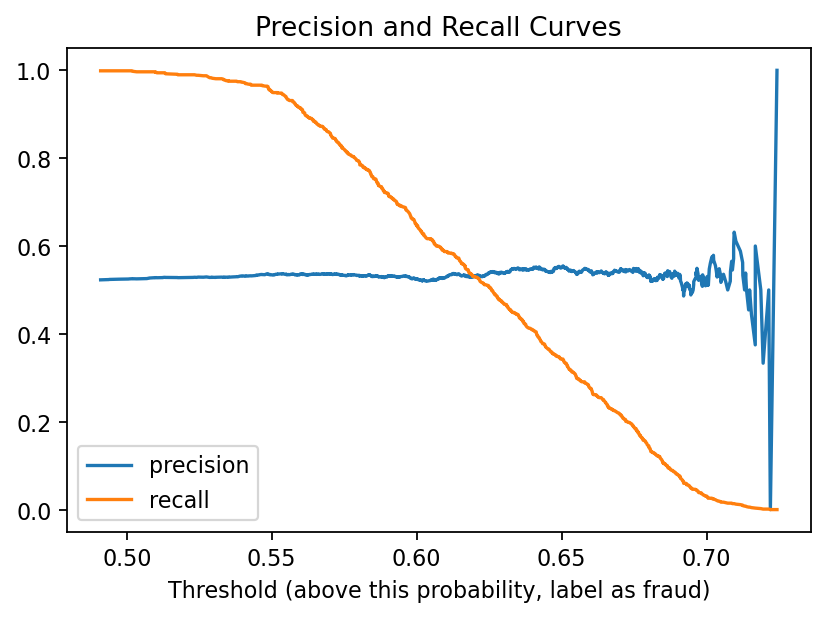

In [132]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, tuned_lr.predict_proba(X_test_std)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves');

#### <a name='split'> Confusion matrix </a>

In [133]:
# Let's see how our confusion matrix changes with changes to the cutoff! 

from ipywidgets import interactive, FloatSlider

interactive(lambda threshold: make_confusion_matrix(tuned_lr,X_test_std, y_test, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

In [134]:
interactive(lambda threshold: make_class_report(tuned_lr,X_test_std, y_test, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

####   <a name='split'> Expr4: with random over sampling </a>

In [135]:
# expr with random over sampling
model = LogisticRegression(C=0.1)

ROS = RandomOverSampler(random_state=42)

X_tr_rs,y_tr_rs= ROS.fit_resample(X_train_std,y_train)

model.fit(X_tr_rs,y_tr_rs)
print("Train : ", model.score(X_tr_rs,y_tr_rs))
print("Test : ",model.score(X_train, y_train))

model_eval(model,X_test_std,y_test) ###




Train :  0.6733333333333333
Test :  0.5966587112171837
F(1): 0.651528384279476
Precision : 0.5317177476835353
Recall : 0.8410372040586246


####  <a name='split'> Exer5: with SMOTE </a> 

In [136]:
# exer with SMOTE
model = LogisticRegression(C=0.1)

smt = SMOTE(random_state=42)

X_tr_smt,y_tr_smt= smt.fit_resample(X_train_std,y_train)

model.fit(X_tr_smt,y_tr_smt)
print("Train : ", model.score(X_tr_smt,y_tr_smt))
print("Test : ",model.score(X_test_std, y_test))

model_eval(model,X_test_std,y_test) ###


Train :  0.6785714285714286
Test :  0.6372727272727273
F(1): 0.6527415143603134
Precision : 0.5315379163713678
Recall : 0.8455467869222097


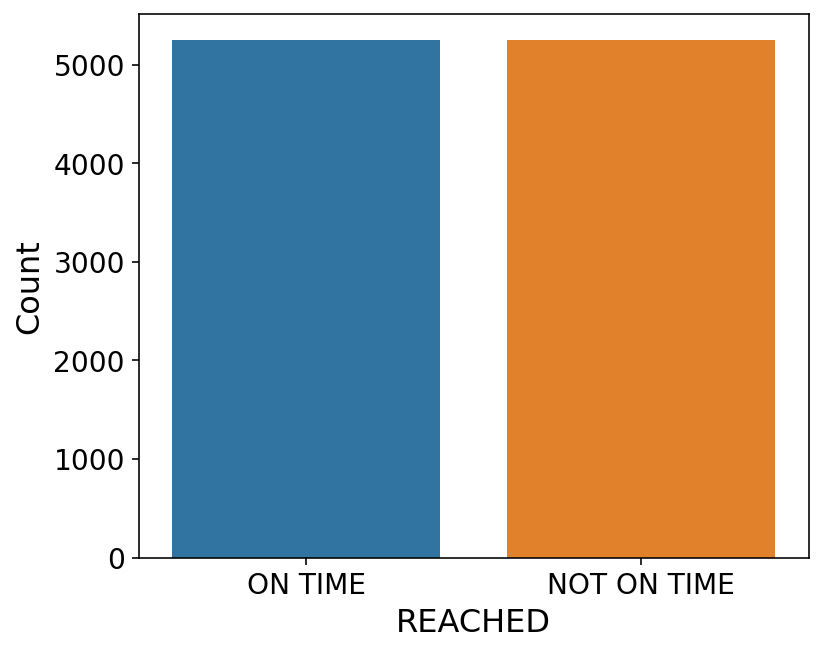

In [137]:
fig_dims = (6,5)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.countplot(y_tr_smt,ax=ax)
g.set_xticklabels(['ON TIME','NOT ON TIME'], fontsize = 18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('REACHED',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.show()

#### <a name='split'> Expr6: with random under sampling </a> 

In [138]:
# exper with random under sampling 
model = LogisticRegression(C=0.1)

rus = RandomUnderSampler(random_state=42)

X_tr_us,y_tr_us= rus.fit_resample(X_train_std,y_train)

model.fit(X_tr_us,y_tr_us)
print("Train : ", model.score(X_tr_us,y_tr_us))
print("Test : ",model.score(X_test_std, y_test))

model_eval(model,X_test_std,y_test) ###


Train :  0.6718794026486334
Test :  0.64
F(1): 0.6577355229040622
Precision : 0.5332866152768044
Recall : 0.8579481397970687


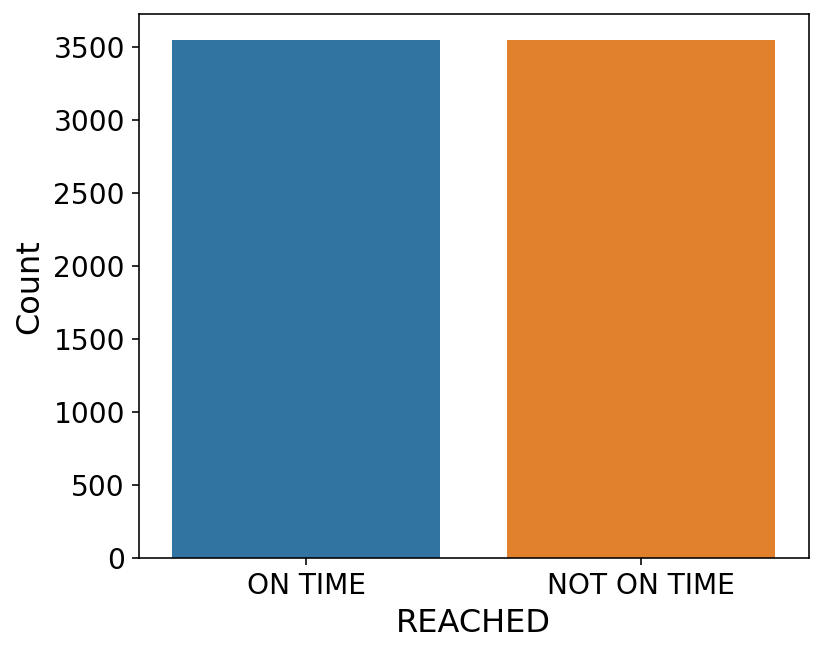

In [139]:
fig_dims = (6,5)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.countplot(y_tr_us,ax=ax)
g.set_xticklabels(['ON TIME','NOT ON TIME'], fontsize = 18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('REACHED',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.show()

####  <a name='split'> Expr7: with using Decision Tree </a>

In [140]:
# Exper using Decision Tree:
from sklearn.tree import DecisionTreeClassifier


In [141]:
decisiontree = DecisionTreeClassifier()

In [142]:
decisiontree.fit(X_train, y_train)
decisiontree.score(X_train, y_train)

0.8968064552790089

In [143]:
decisiontree.score(X_test, y_test)

0.6063636363636363

In [144]:
model_eval(decisiontree,X_test,y_test) ####

F(1): 0.4770531400966184
Precision : 0.5136540962288687
Recall : 0.44532130777903045


#### <a name='split'> Tuning Decision Tree </a> 

In [145]:
model = DecisionTreeClassifier()
params = {'max_depth' : [3, 5, 7, 8, 11, 12],'min_samples_split' : [2, 3, 5, 9], 'criterion' : ["gini", "entropy"]}

gs_dt = GridSearchCV(model, param_grid = params, n_jobs=-1, cv=10, verbose=10)
gs_dt.fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 8, 11, 12],
                         'min_samples_split': [2, 3, 5, 9]},
             verbose=10)

In [146]:
## get cross validated train score & best parameters
print(gs_dt.best_score_)
print(gs_dt.best_params_)

0.6407525338711346
{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}


In [147]:
## saved tuned model for future use 
tuned_dt = gs_dt.best_estimator_

In [148]:
## get train & test scores
print(f'Train score: {tuned_dt.score(X_train, y_train)}')
print(f'Test score: {tuned_dt.score(X_test, y_test)}')
model_eval(tuned_dt,X_test,y_test) ####

Train score: 0.654733492442323
Test score: 0.6227272727272727
F(1): 0.6311111111111111
Precision : 0.520909757887014
Recall : 0.8004509582863585


#### <a name='split'> Exper8: with using Random forest </a>

In [149]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train,y_train)
print(randomforest.score(X_train,y_train))
print(randomforest.score(X_test,y_test))

0.8968064552790089
0.5995454545454545


In [150]:
model = RandomForestClassifier()
params = {'max_depth' : [3, 5, 7, 8, 11, 12],'min_samples_split' : [2, 3, 5, 9], 'criterion' : ["gini", "entropy"],
          'n_estimators' : [10, 20, 40, 50, 70], 'max_features' : ["auto", "sqrt", "log2"]}

gs_rf = GridSearchCV(model, param_grid = params, n_jobs=-1, cv=10, verbose=10)
gs_rf.fit(X_train, y_train)

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 8, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 5, 9],
                         'n_estimators': [10, 20, 40, 50, 70]},
             verbose=10)

In [151]:
## get cross validated train score & best parameters
print(gs_rf.best_score_)
print(gs_rf.best_params_)

0.6455265539352569
{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 20}


In [152]:
## saved tuned model for future use 
tuned_rf = gs_rf.best_estimator_

In [153]:
## get train & test scores
print(f'Train score: {tuned_rf.score(X_train, y_train)}')
print(f'Test score: {tuned_rf.score(X_test, y_test)}')

model_eval(tuned_rf,X_test,y_test)###



Train score: 0.6893965223320832
Test score: 0.6286363636363637
F(1): 0.6162517613903241
Precision : 0.5281803542673108
Recall : 0.7395715896279594


#### <a name='split'> Exper9: with Voting Classifier with KNN, Logistic Regression & Random Forest </a>

In [154]:
from sklearn.neighbors import KNeighborsClassifier

In [155]:
### KNN
knn = KNeighborsClassifier()
knn.fit(X_train_std, y_train)
print(f'Train score: {knn.score(X_train_std, y_train)}')
print(f'Test score: {knn.score(X_test_std, y_test)}')
model_eval(knn,X_test_std,y_test) ###



Train score: 0.7546312080918286
Test score: 0.6145454545454545
F(1): 0.5361050328227571
Precision : 0.5207226354941552
Recall : 0.552423900789177


In [156]:
model = KNeighborsClassifier()

k_range = list(range(1, 100))
params = {'n_neighbors': k_range}

gs_knn = GridSearchCV(model, param_grid = params, n_jobs=-1, cv=10, verbose=10)
gs_knn.fit(X_train_std, y_train)

Fitting 10 folds for each of 99 candidates, totalling 990 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             verbose=10)

In [157]:
## get cross validated train score & best parameters
print(gs_knn.best_score_)
print(gs_knn.best_params_)

0.6218890267866377
{'n_neighbors': 1}


In [158]:
## saved tuned model for future use 
tuned_knn = gs_knn.best_estimator_

In [159]:
## get train & test scores
print(f'Train score: {tuned_knn.score(X_train_std, y_train)}')
print(f'Test score: {tuned_knn.score(X_test_std, y_test)}')
model_eval(tuned_knn,X_test_std,y_test) ###

Train score: 0.8821456983748153
Test score: 0.6031818181818182
F(1): 0.5168788046485888
Precision : 0.5076086956521739
Recall : 0.5264937993235626


In [160]:
model_names = ["tuned_dt", "tuned_rf", "tuned_knn"]
model_vars = [eval(n) for n in model_names]
model_list = list(zip(model_names, model_vars))

In [161]:
# Get peek at individual test scores

print(f' Logreg Test score: {tuned_dt.score(X_test_std, y_test)}')
print(f' Random forest Test score: {tuned_dt.score(X_test, y_test)}')
print(f' KNN Test score: {tuned_knn.score(X_test_std, y_test)}')

 Logreg Test score: 0.5972727272727273
 Random forest Test score: 0.6227272727272727
 KNN Test score: 0.6031818181818182


In [162]:
from sklearn.ensemble import VotingClassifier
# create voting classifier
voting_classifer = VotingClassifier(estimators=model_list,
                                    voting='soft', 
                                    n_jobs=-1)
voting_classifer.fit(X_train, y_train)

VotingClassifier(estimators=[('tuned_dt', DecisionTreeClassifier(max_depth=5)),
                             ('tuned_rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=7,
                                                     max_features='sqrt',
                                                     n_estimators=20)),
                             ('tuned_knn',
                              KNeighborsClassifier(n_neighbors=1))],
                 n_jobs=-1, voting='soft')

In [163]:
from sklearn.metrics import accuracy_score
# Get accuracy 
y_pred = voting_classifer.predict(X_test)
accuracy_score(y_test, y_pred)

0.6122727272727273

In [164]:
model_eval(voting_classifer,X_test,y_test) ###

F(1): 0.5111747851002865
Precision : 0.5198135198135199
Recall : 0.5028184892897407


####  <a name='split'> Exper10: with Stacking Classifie </a>

In [165]:
from mlxtend.classifier import StackingClassifier

In [166]:
stacked = StackingClassifier(
    classifiers= model_vars, meta_classifier=LogisticRegression(), use_probas=False)

stacked.fit(X_train, y_train)

StackingClassifier(classifiers=[DecisionTreeClassifier(max_depth=5),
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=7,
                                                       max_features='sqrt',
                                                       n_estimators=20),
                                KNeighborsClassifier(n_neighbors=1)],
                   meta_classifier=LogisticRegression())

In [167]:
y_pred = stacked.predict(X_test)
accuracy_score(y_test, y_pred)

0.6113636363636363

In [168]:
model_eval(stacked ,X_test,y_test) ###

F(1): 0.510589582140813
Precision : 0.5186046511627908
Recall : 0.5028184892897407


#### <a name='split'> Exper11: with xgboost </a>

In [169]:
import xgboost as xgb

In [170]:
gbm = xgb.XGBClassifier( 
                        n_estimators=30000,
                        max_depth=4,
                        objective='binary:logistic', #new objective
                        learning_rate=.05, 
                        subsample=.8,
                        min_child_weight=3,
                        colsample_bytree=.8
                       )

eval_set=[(X_train,y_train),(X_test,y_test)]
fit_model = gbm.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='error', #new evaluation metric: classification error (could also use AUC, e.g.)
                    early_stopping_rounds=50,
                    verbose=False
                   )

accuracy_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit)) 

0.6463636363636364

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

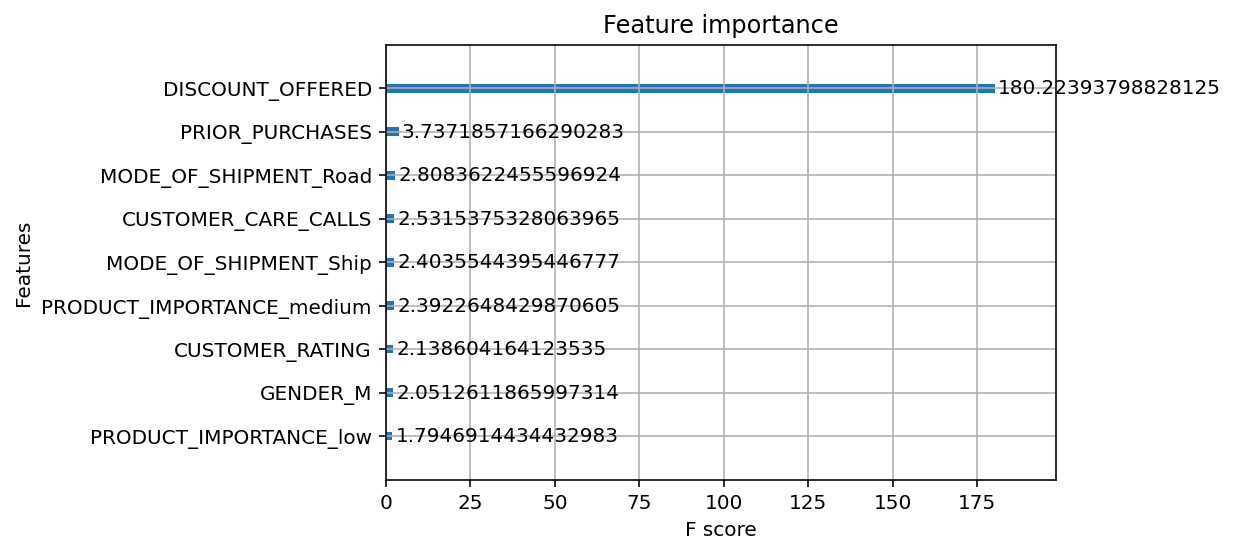

In [171]:
xgb.plot_importance(gbm, importance_type='gain')

In [172]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [173]:
model = xgb.XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic')

In [174]:
from sklearn.model_selection import RandomizedSearchCV

param_comb = 70

random_search = RandomizedSearchCV(model, param_distributions=params, n_iter=param_comb, scoring='f1', n_jobs=-1, cv=10, verbose=3, random_state=42)

random_search.fit(X_train, y_train) 

Fitting 10 folds for each of 70 candidates, totalling 700 fits
[08:37:44] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=0.02,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraint...
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None,
                           

In [175]:
print('Best score:')
print(random_search.best_score_)

Best score:
0.6936187674283467


In [176]:
print('Best estimator:')
print(random_search.best_estimator_)

Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0,
              enable_categorical=False, gamma=5, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1.0, tree_method='exact', validate_parameters=1,
              verbosity=None)


In [177]:
model_eval(gbm ,X_test,y_test) ###

F(1): 0.6847649918962723
Precision : 0.534471853257432
Recall : 0.9526493799323562


In [178]:
tuned_xgb = random_search.best_estimator_

In [179]:
tuned_xgb.score(X_test, y_test)

0.6459090909090909

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

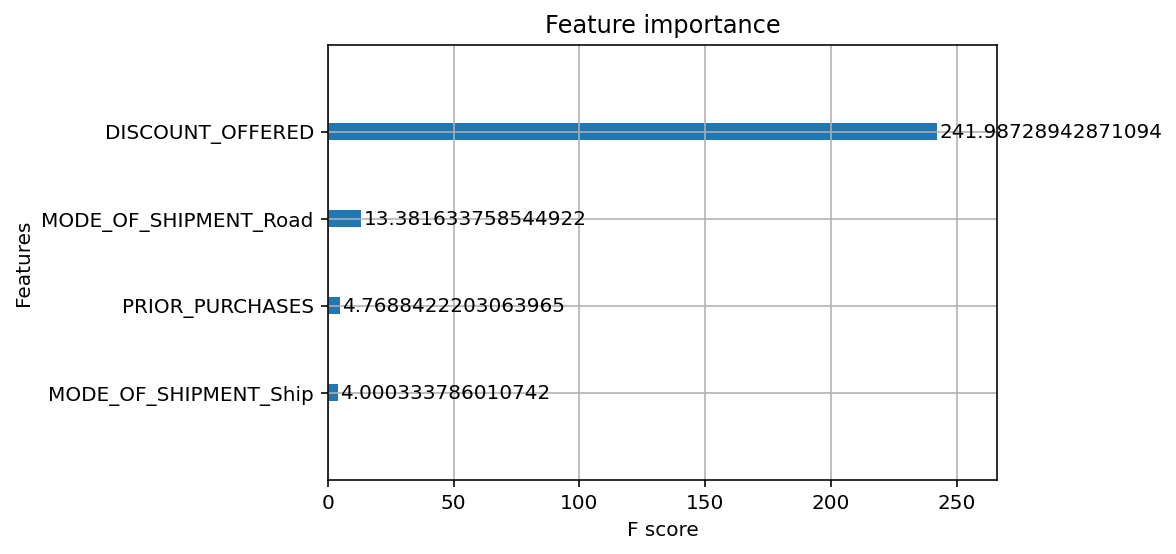

In [180]:
xgb.plot_importance(tuned_xgb, importance_type='gain')

### <a name='split'> ROC curve </a>

ROC AUC score =  0.7034631569999424
Threshold value is: 0.52347195


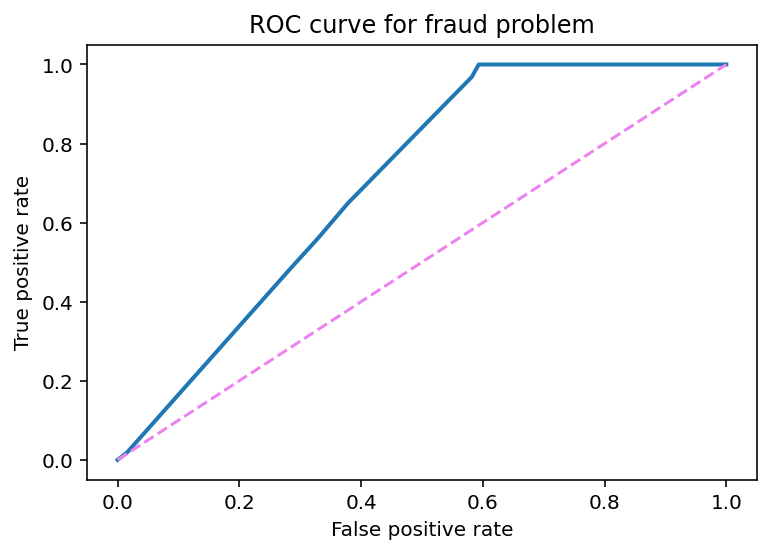

In [190]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt  

fpr, tpr, thresholds = roc_curve(y_test, tuned_xgb.predict_proba(X_test)[:,1]) 

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for fraud problem');
print("ROC AUC score = ", roc_auc_score(y_test, tuned_xgb.predict_proba(X_test)[:,1]))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)

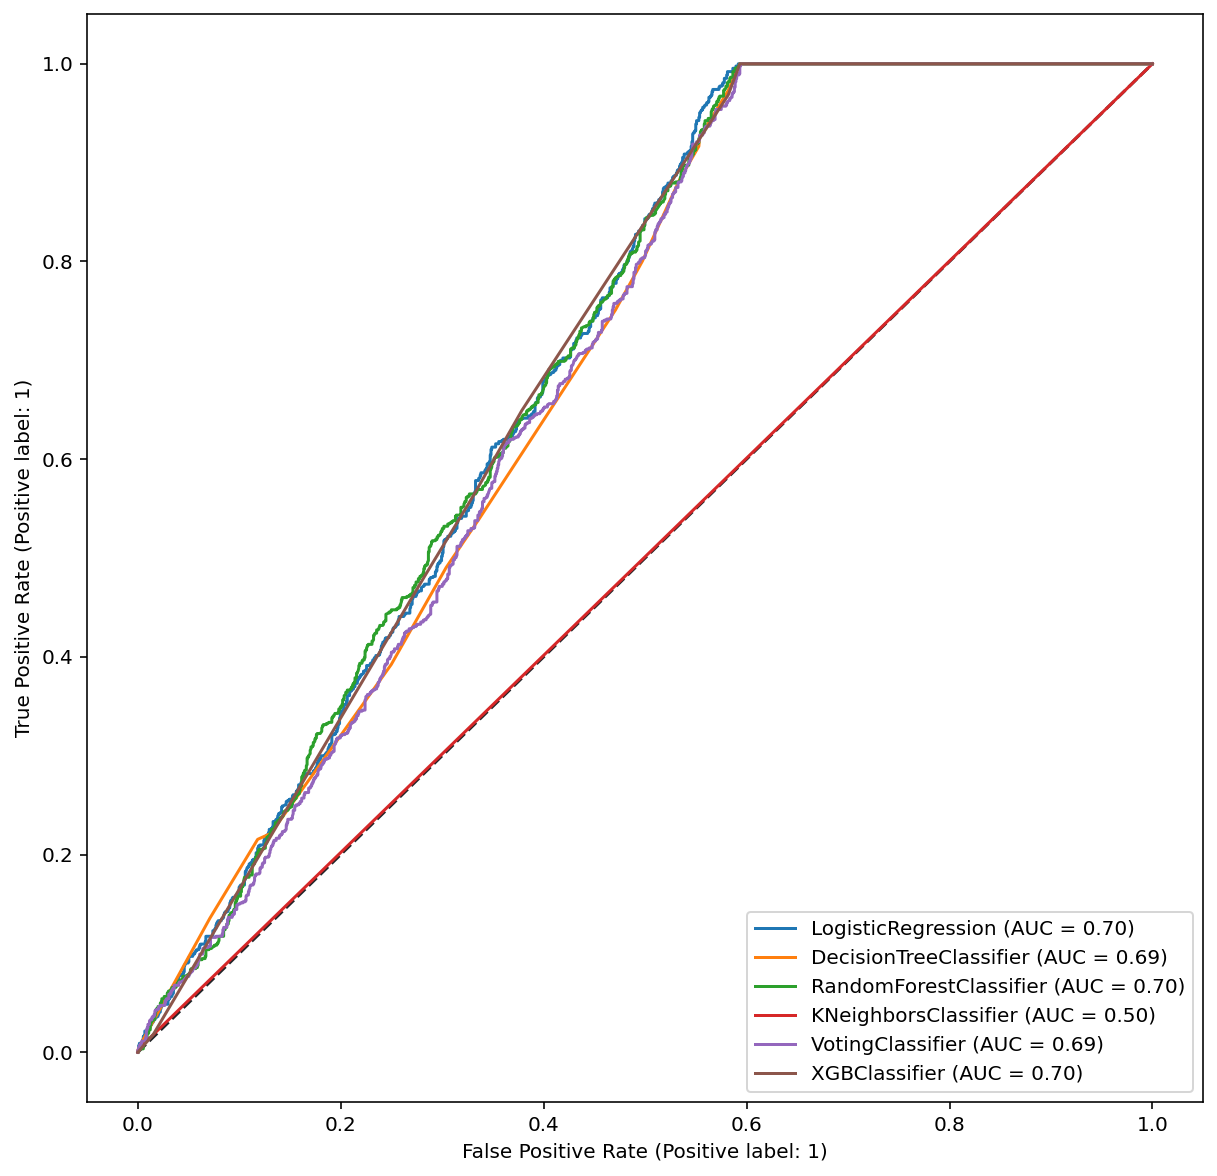

In [191]:
from sklearn.metrics import plot_roc_curve

plt.figure(figsize=(10,10)) 
classifiers = [tuned_lr, tuned_dt, tuned_rf, tuned_knn, voting_classifer, tuned_xgb]
x=np.linspace(0,1,10000)
plt.plot(x, x,color="#212529", linestyle='--')
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test, y_test, ax=ax)
    plt.savefig('FCORR.png', transparent=True, bbox_inches='tight');

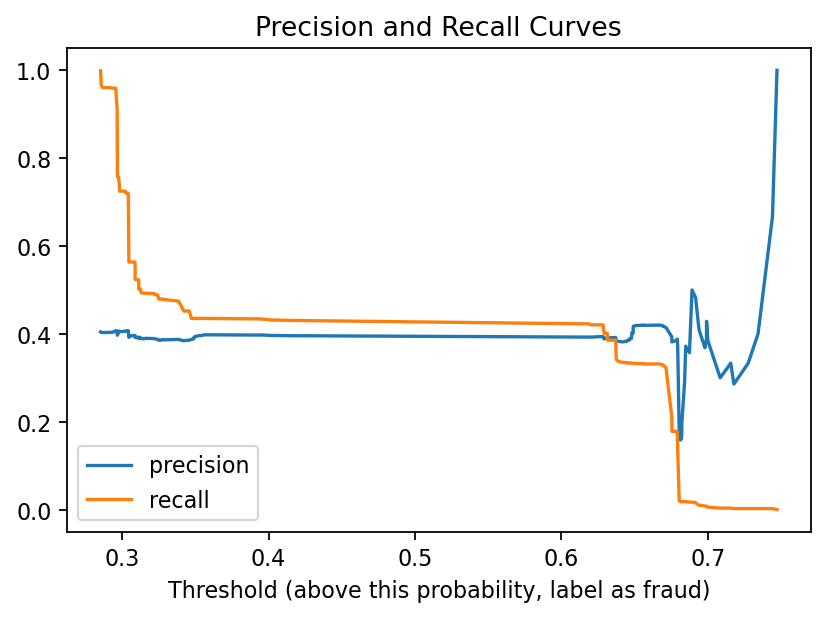

In [185]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, voting_classifer.predict_proba(X_test_std)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves');